In [120]:
# ライブラリ
import random
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
# warning非表示
import warnings
warnings.simplefilter('ignore')

# 記述統計量

## 基本統計量

In [121]:
# csvファイルの読み込み
# 400人の生徒のテストの点数のデータ
df = pd.read_csv('./scores_400.csv')
print(df)

# 基本統計量
print(df.describe())

     score
0       76
1       55
2       80
3       80
4       74
..     ...
395     77
396     60
397     83
398     80
399     85

[400 rows x 1 columns]
            score
count  400.000000
mean    69.530000
std     14.393994
min     23.000000
25%     60.000000
50%     69.000000
75%     80.000000
max    100.000000


In [122]:
# 一応個別で重要な基本統計量を
# サンプルサイズ
print('サンプルサイズ:', len(df['score']))

# 平均値
print('平均値:', np.mean(df['score']))

# 中央値
print('中央値:', np.median(df['score']))

# 最大値
print('最大値:', np.max(df['score']))

# 最小値
print('最小値:', np.min(df['score']))

# 最頻値
print('最頻値:', stats.mode(df['score']))

# 標本分散
print('分散:', np.var(df['score'], ddof=0))
# 標準偏差
print('標準偏差:', np.std(df['score'], ddof=0))

# 不偏分散
print('不偏分散(Pandas):', df['score'].var())
#print('不偏分散(Numpy):', np.var(df['score'], ddof=1))

# 不偏標準偏差
print('不偏標準偏差(Pandas):', df['score'].std())
#print('不偏標準偏差(Numpy):', np.std(df['score'], ddof=1))

サンプルサイズ: 400
平均値: 69.53
中央値: 69.0
最大値: 100
最小値: 23
最頻値: ModeResult(mode=array([68]), count=array([16]))
分散: 206.6691
標準偏差: 14.375990400664575
不偏分散(Pandas): 207.18706766917293
不偏標準偏差(Pandas): 14.39399415274207


- Numpyはddofで指定することにより、自由度を選べる（デフォルトはddof = 0の標本分散）<br>
- Pandasのデフォルトは全て<b>不偏分散、不偏標準偏差</b>になっているため注意

## 度数分布表
[Qiita - Pythonで度数分布表を一発で自動生成する@TakuTaku36](https://qiita.com/TakuTaku36/items/91032625e482f2ae6e18)

In [123]:
# 母集団から50人を抽出
scores = df[0:50]

In [124]:
def Frequency_Distribution(data, class_width=None):
    data = np.asarray(data)
    if class_width is None:
        class_size = int(np.log2(data.size).round()) + 1
        class_width = round((data.max() - data.min()) / class_size)

    bins = np.arange(0, data.max()+class_width+1, class_width)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame({'階級値': (bins[1:] + bins[:-1]) / 2,
                         '度数': hist,
                         '累積度数': cumsum,
                         '相対度数': hist / cumsum[-1],
                         '累積相対度数': cumsum / cumsum[-1]},
                        index=pd.Index([f'{bins[i]}以上{bins[i+1]}未満'
                                        for i in range(hist.size)],
                                       name='階級'))
Frequency_Distribution(scores)

,階級値,度数,累積度数,相対度数,累積相対度数
階級,,,,,
0以上10未満,5.0,0,0,0.00,0.00
10以上20未満,15.0,0,0,0.00,0.00
20以上30未満,25.0,1,1,0.02,0.02
30以上40未満,35.0,0,1,0.00,0.02
40以上50未満,45.0,3,4,0.06,0.08
50以上60未満,55.0,6,10,0.12,0.20
60以上70未満,65.0,9,19,0.18,0.38
70以上80未満,75.0,15,34,0.30,0.68
80以上90未満,85.0,13,47,0.26,0.94


## ヒストグラム

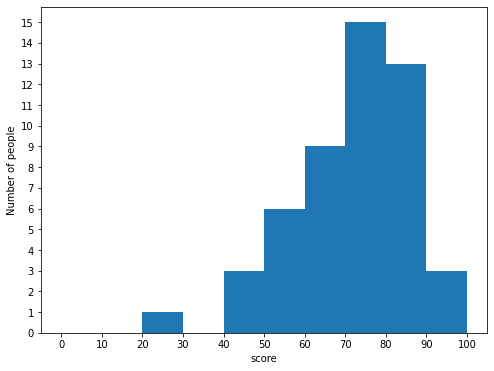

In [125]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(scores, bins=10, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('Number of people')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

## 箱ひげ図

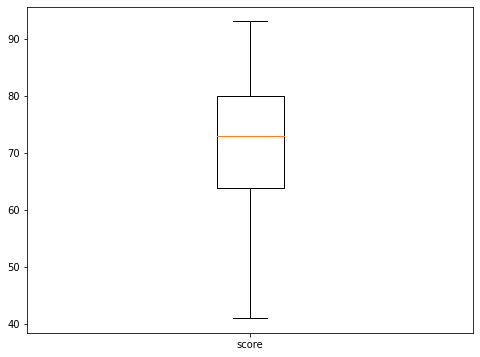

In [128]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.boxplot(scores, labels = ['score'], sym='')
plt.show()

### はずれ値（テストの点数という例はあまりよくないが、、）

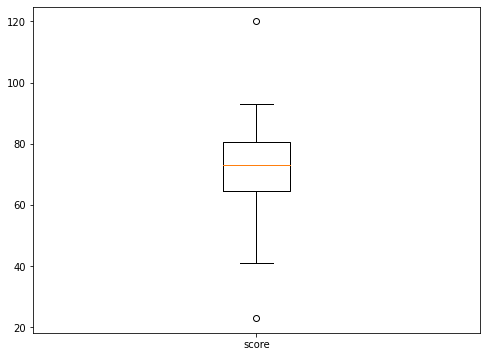

第一四分位数(25%点): 64.5
第三四分位数(75%点): 80.5
四分位範囲: 16.0
下限: 40.5
上限: 104.5


In [129]:
# 120点という外れ値を追加
scores_new = scores.append({'score':120},ignore_index=True)
scores_new

# 箱ひげ図
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.boxplot(scores_new, labels = ['score'])
plt.show()

# 第三四分位数(75%点), 第一四分位数(25%点)を取得
q75, q25 = np.percentile(scores_new, [75 ,25])
iqr = q75 - q25
# 下限
lower = q25 - (iqr * 1.5)
# 上限
upper = q75 + (iqr * 1.5)
print("第一四分位数(25%点):", q25)
print("第三四分位数(75%点):", q75)
print("四分位範囲:", iqr)
print('下限:',lower)
print('上限:',upper)

# 統計的推定

## 推測統計の一例

Aさんの学年では400人の生徒がいる。定期テストが開かれAさんの数学の点数は80点だった。しかし学年の平均点が公表されず、Aさんは自分の学力がどのレベルにあるのか分からなくて困っている。全員に点数を聞くのは不可能なため、たまたますれ違った20人に点数を聞き平均を求めた結果「70点」であったため、自分の点数が平均より上で満足できた。

In [19]:
# 先ほどのデータを使用
df.head()

,score
0,76
1,55
2,80
3,80
4,74


## 無作為抽出

In [30]:
# 無作為抽出にはnp.ramdom.choice()を使用
print(np.random.choice([0,1,2,3,4], 5)) # 復元抽出
print(np.random.choice([0,1,2,3,4], 5, replace=False)) # 非復元抽出

[0 0 4 0 3]
[2 0 4 3 1]


np.random.choice関数はデフォルトでは<b>復元抽出</b>（複数回同じ標本を選ぶ抽出方法）を行っている。<br>
np.random.choiceの引数replaceをFalseにすることで<b>非復元抽出</b>（同じ標本を一度しか選ばない方法）を行うことができる。<br>

非復元抽出では、個体を取り出すたびに母集団から個体が減っていくので、毎回の試行は試行として独立ではない。<br>
一方、復元抽出では毎回全く同じ母集団から個体を取り出すことになるので、毎回の試行は互いに独立であり、独立試行になる。<br>

In [49]:
# 母平均を算出
df['score'].mean()

69.53

母平均は69.53点であるため、Aさんが始めに20人に聞いて算出した70点という標本平均の推測はなかなかよさそう<br>

では、実際に無作為抽出を行ってその標本平均の計算を何回か行ってみる。

In [50]:
# 無作為抽出を行い,標本平均を計算する
np.random.seed(3)
for i in range(5):
    sample = np.random.choice(df['score'], 20).mean()
    print(f'{i+1}回目の無作為抽出で得た標本平均', sample)

1回目の無作為抽出で得た標本平均 68.65
2回目の無作為抽出で得た標本平均 72.6
3回目の無作為抽出で得た標本平均 68.95
4回目の無作為抽出で得た標本平均 68.45
5回目の無作為抽出で得た標本平均 69.55


標本平均は大体70点前後になっているが、それなりにばらつきはある
◀︎資料へ戻る

## 推測統計における確率について

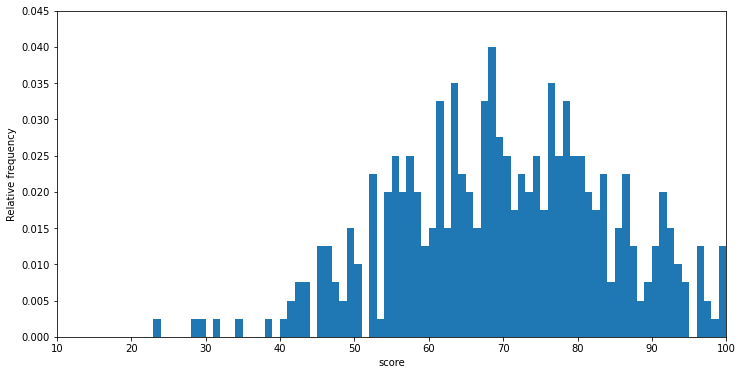

In [65]:
# 全生徒の点数がどのような分布になっているか、階級幅を一点にしてヒストグラムを表示
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.hist(df['score'], bins=100, range=(0, 100), density=True) # ヒストグラムの縦軸を相対度数に
ax.set_xlim(10, 100)
ax.set_ylim(0, 0.045)
ax.set_xlabel('score')
ax.set_ylabel('Relative frequency')
plt.show()

In [131]:
score_a = df['score']== 68
score_b = df['score']== 80
score_c = df['score']== 100
print('68点の人数の相対度数:', score_a.sum()/400)
print('80点の人数の相対度数:', score_b.sum()/400)
print('100点の人数の相対度数:', score_c.sum()/400)

68点の人数の相対度数: 0.04
80点の人数の相対度数: 0.025
100点の人数の相対度数: 0.0075


たとえば、68点をとった生徒は全生徒の0.04(=4%)を占めていることがわかる。このことから無作為抽出を行うと4%の確率で69点という標本データを得ることになる。<br>
これは他の点数についても同様で、相対度数がその点数を得る確率に対応するため、このヒストグラムを母集団の確率分布とみなすことができる。<br>

つまり、実際に、無作為抽出で得た20人のテストの点数は、期待値が母集団の確率分布に従う、互いに独立な確率変数$X_1,X_2,...,X_{20}$と考えることもできます。

|点数|0|1|⋯|68|⋯|80|⋯|100|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|確率|0|0|⋯|0.04|⋯|0.25|⋯|0.0075|

そして、それから計算される標本平均$\bar{X} =  \frac{X_1+X_2+...+X_{20}}{n}$もまた確率変数になっていて、試行のたびに得られる結果は異なります（無作為抽出で得た標本平均がばらばらだった）。<br>

無作為抽出はこのような確率分布に従う確率変数の試行である。

無作為抽出において、標本のサンプルサイズを増やしていくと、標本データの相対度数は上の確率分布に近づいていく。<br>
無作為抽出によってサンプルサイズ10000の標本を抽出して、その結果をヒストグラムに図示してみる。

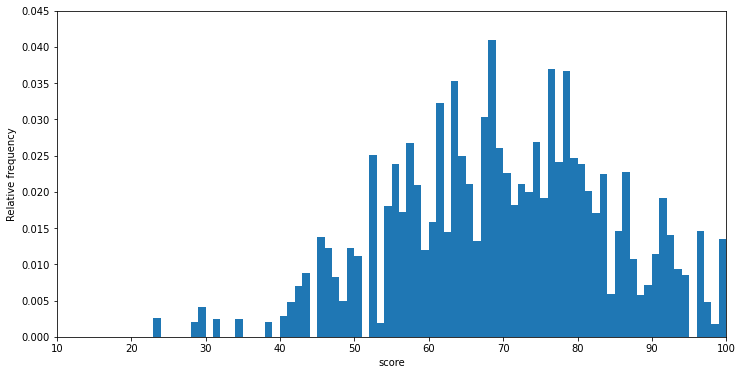

In [66]:
sample = np.random.choice(df['score'], 10000)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(10, 100)
ax.set_ylim(0, 0.045)
ax.set_xlabel('score')
ax.set_ylabel('Relative frequency')
plt.show()

サンプルサイズを増やしていけば、実際の分布に収束することがわかる。<br>

最後に標本平均について。<br>
ここでは無作為抽出でサンプルサイズ20の標本を抽出して標本平均を計算するという作業を10000回行い、その結果をヒストグラムに図示することで、標本平均の分布がどのようになるか確認する。

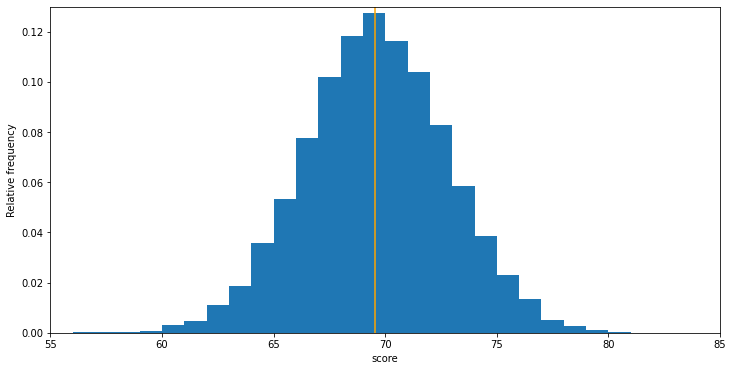

In [90]:
sample_means = [np.random.choice(df['score'], 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
ax.vlines(np.mean(df['score']), 0, 1, 'orange') # 母平均を縦線で表示
ax.set_xlim(55, 85)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('Relative frequency')
plt.show()

中央の縦線が母平均になる。標本平均にばらつきはあるものの、母平均を中心に分布することがわかる。これが無作為抽出による標本平均で母平均を推測できることの根拠になっている。

## まとめ
これらを通して、推測統計が実際に確率を使って母集団の統計的性質を推測する手法